# Validating the Classification Model

## Agenda

- Why we shouldn't train and test on the entire dataset?
- What is the benefit/drawback of using the **train/test split** procedure for model evaluation?
- How does **K-fold cross-validation** overcome this limitation?
- How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?

---

## Review

- Classification task: Predicting the species of an unknown iris
- Used three classification models: KNN (K=1), KNN (K=5), logistic regression
- Need a way to choose between the models


## Why we shouldn't train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [1]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

### Logistic regression

In [2]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [4]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

# don't get perfect accuarcy on training because data is unseen...really need to split between training and testing.

0.9733333333333334


- Known as **training accuracy** when you train and test the model on the same data

### KNN (K=5)

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


### KNN (K=1)

In [6]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

# get perfect accuarcy because this is on training, so it fit every point.

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

![Overfitting](images/05_overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

## What is the benefit/drawback of using the **train/test split** procedure for model evaluation?

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [7]:
# print the shapes of X and y
# now will do training and testing
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [8]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [9]:
# print the shapes of the new X objects
#(training data)
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [10]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [11]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


See that it was trained well because get similar results

Repeat for KNN with K=5:

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


Repeat for KNN with K=1:

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Previously got 1.0, now get 0.95 because it is test data now.

**Train/test split Benefits/Drawbacks**

- Split the dataset into two pieces, so that the model can be trained and tested on different data
- Better estimate of out-of-sample performance, but still a "high variance" estimate
- Useful due to its speed, simplicity, and flexibility

## K-fold cross-validation

What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

- Even better estimate of out-of-sample performance
- Runs "K" times slower than train/test split

1. K can be any number, but **K=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

Cross-validation steps:

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

Diagram of **5-fold cross-validation:**

![5-fold cross-validation](images/07_cross_validation_diagram.png)


### Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# 10 is probably not a great amount, but is better than only 1
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [17]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9666666666666668


In [18]:
# search for an optimal value of K for KNN
# checking k values from 1 to 31
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]


Text(0,0.5,'Cross-Validated Accuracy')

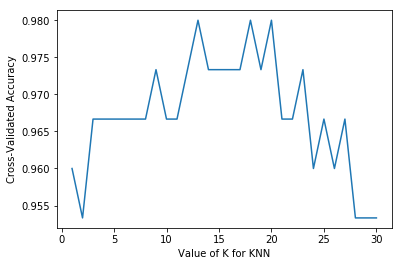

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

- Remember **Training accuracy** rises as model complexity increases
- Note **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)
- Therefore, the "best" model in the Figure is for K=20 - it is less complex and provides the best accuracy

### Cross-validation example: model selection

**Goal:** Compare the best KNN model with logistic regression on the iris dataset

In [20]:
# 10-fold cross-validation with the best KNN model
# choose K=20 because least complicated with best accuarcy
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [21]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9733333333333334


## Exercise 

Use cross-validation to choose the best knn model and compare it to logistic regression on wine dataset

In [31]:
# import load_iris function from datasets module
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target

# should standardize when distance matters, but should not be done before the splitting between training and testing, because then you are cheating
#scaler = StandardScaler().fit(X)
#standardize_X = scaler.transform(X)

# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    #scores = cross_val_score(knn, standardize_X, y, cv=10, scoring='accuracy')
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.7478134674922601, 0.6708032335741314, 0.7219341245270037, 0.6653573271413828, 0.6757739938080495, 0.6709128826969384, 0.663968438252494, 0.7032593739250086, 0.6980714654282766, 0.6977446680426558, 0.7144457344341245, 0.6921891124871001, 0.6918967148262813, 0.6862659098727211, 0.72000128998968, 0.708890178878569, 0.697452270381837, 0.7147381320949433, 0.7036270209838321, 0.6983638630890953, 0.7091825765393877, 0.7147381320949433, 0.7314047987616099, 0.7026057791537668, 0.7147381320949433, 0.7147381320949433, 0.7091825765393878, 0.7147381320949433, 0.7147381320949433, 0.7147381320949433]


Text(0,0.5,'Cross-Validated Accuracy')

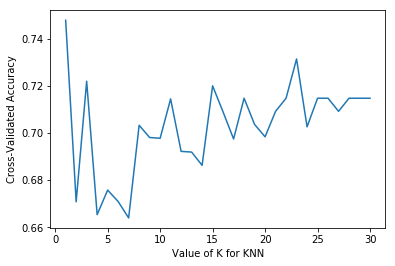

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [24]:
# 10-fold cross-validation with the best KNN model
# using k=1 because it has the best accuarcy
knn = KNeighborsClassifier(n_neighbors=1)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.7478134674922601


In [26]:
# 10-fold cross-validation with logistic regression
# increased max_iter=10000 so that model would converge
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000, multi_class='auto', solver='lbfgs')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9669590643274854


## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data